

---


# Rapport Dreem Data Challenge 2022




Antoine DARGIER & Thomas DOUILLY (Nom d'équipe : ADARGIER_TDOUILLY)


---



## Introduction

<font size="1">Ce Dreem Data Challenge a pour but de trouver un modèle de Machine ou de Deep Learning capable d'interpréter les données du casque Dreem Headband permettant de récupérer les données de mouvement du patient ainsi que les données issues des impulsions électriques neuronales à différents emplacements du cerveau de ce dernier.  
En particulier, nous avons à notre disposition 9 enregistrements, correspondant à 9 nuits permettant d'entrainer et tester le modèle d'apprentissage mis en place. Nous avons ainsi pu bâtir deux modèles différents, un modèle de type Machine Learning bâti sur le modèle XG Boost et un autre bâti sur un modèle de réseau neuronal convolutif (CNN). Le premier s'est révélé particulièrement efficace et nous avons pu obtenir un pourcentage de fiabilité de 71 % sur une partie des trois enregistrement destinés au test des modèles.</font>

## Pré-traitement des données

<font size="1">
Les données prises en entrée sont des données agrégées obtenues à l'aide d'un Dreem Headband lors d'une session de capture durant 30 secondes. En particulier, on dénote parmi ces données des séries temporelles représentant :

*   <font size="1">Cinq électro-encéphalogrammes (eeg), chacun étant échantillonné à une fréquence 250Hz. Ce sont donc cinq séquences d'une longueur de 7500.</font>
*   <font size="1">Trois accélérogrammes (directions x, y et z), chacun étant échantillonné à une fréquence 50Hz. Ce sont donc trois nouvelles séquences d'une longueur de 1500.</font>

<font size="1">
En l'occurence, nous avons à notre disposition 9 échantillons de ces données agrégées, dont 6 sont annotés avec les phases de sommeil correspondantes et 3 ont pour vocation de tester l'implémentation utilisée.</font>  

<font size = "1">
De par la méthode d'acquisition, mais également pour d'autres raisons physiques, ces signaux peuvent être bruités et donc assez "sales". Ce bruit peut en effet représenter un risque dans l'apprentissage en biaisant plus ou moins sévèrement le calcul des features. En particulier, si des features telles que la moyenne ou l'écart-type ne devraient être que peu influencées par un tel bruit, de potentielles features caclulées sur ses composantes fréquentielles pourraient varier.
</font>

<font size = "1"> 
Afin d'essayer d'anticiper ces problèmes, nous avons tenté de mettre en place plusieurs méthodes de pré-traitement des données.  
Tout d'abord, nous avons tenté de transformer les différents signaux en spectrogrammes, qui peuvent se révéler plus faciles à analyser pour des modèles de type convolutifs comme le CNN. Toutefois, puisque nous avons conservé un type de modèle de type Machine Learning, ce pré-traîtement ne nous a pas été utile, mis à part pour calculer les features relatives à la fréquence.
</font>

<font size = "1">
Par suite, suivant les recommendations établies dans [1], nous avons tenté de mettre en place des filtres fréquentiels de type IIR et FIR suivant les paramètres données dans la littérature. Ces filtres ont été appliqués sur les cinq électro-encéphalogrammes. Toutefois, ils n'ont pas permis d'obtenir des résultats probants et ont même par moments fait baisser la précision de notre modèle en terme de prédictions. Cela peut être en partie dû à une mauvaise configuration de ces filtres. Ainsi, un processus de fine tuning aurait pu être mis en place afin d'essayer de trouver les fréquences de coupure idéales pour ceux-ci, mais, au vu de l'impact limité auquel nous nous attendions pour l'implémentation de tels filtres - les features de type "fréquentiel" ne représentant qu'une petite partie de notre pool de features - nous avons donc décidé de ne pas retenir ce type de pré-traîtement des données. Nous avons également essayé des filtres passe-bande, ce qui nous était conseillé dans la littérature. Nous avons gardé les fréquences de 0.5 à 50 Hz pour les EEG, comme recommandé dans [2], et établi un filtre passe-haut de fréquence de coupure 0.1 Hz pour les accéléromètres [3].
</font>

## Extraction des features

<font size="1">
Afin de faire évoluer notre modèle, nous avons mis en place un vaste panel de features sur lesquelles l'algorithme de machine learning peut se baser pour effectuer son apprentissage. L'objectif de ces features est d'essayer de représenter assez précisémment chaque partie du signal et de faire apparaître quantitativement des comportements convergeant entre des signaux reflétant les mêmes phases de sommeil. De plus, il est important, autant en terme de performances que de précision, que ces features soient dé-corrélées, l'une l'autre.  
</font>  

<font size="1">
Nous avons donc menés des tests sur un pool de features assez important afin d'étudier ces deux facteurs pour garantir au modèle des capacités d'apprentissage optimales.
</font>

<font size = "1">
Ainsi, les features que nous avons considérées peuvent être découpées en deux catégories en fonction de leur méthode de calcul, auxquelles s'ajoute une dernière liste de features qui n'étaient pas concluantes :
</font>

1.   <font size = "1"> Des statistiques sur les séries temporelles  
Que ce soit pour les canaux d'EEG ou les accéléromètres, nous avons choisi 5 statistiques pour caractériser ces signaux, en se basant sur les paramètres universellement utilisés en études statistiques de variables aléatoires : </font>

> *   <font size = "1">Leur moyenne</font>
*   <font size = "1">Leur médiane</font>
*   <font size = "1">Leur écart-type</font>
*   <font size = "1">Leur skewness : ce paramètre mesure l'assymétrie du signal, et se calcule avec la formule :  
$skewness = 𝜠[(\frac{X-\mu}{\sigma})^3]$  
où $X$ est une variable aléatoire réelle, $\mu$ sa moyenne, $\sigma$ son écart-type</font>
*   <font size = "1">Leur kurtosis : ce paramètre est aussi appelé coefficient d'applatissement, et se calcule avec la formule :  
$kurtosis = 𝜠[(\frac{X-\mu}{\sigma})^4]$  
où $X$ est une variable aléatoire réelle, $\mu$ sa moyenne, $\sigma$ son écart-type.</font>


2.   <font size = "1"> Des fonctions d'analyse du signal </font>

<font size = "1">Cet autre groupe de features a été calculé, se reposant sur les théories d'analyse de signaux. Leur pertinence a été testée dans notre cas, et appuyée par des papiers de recherche, notamment [4]. Dans notre cas, nous avons ainsi retenu les features suivantes :</font>
> *   <font size = "1">le zero-crossing-rate : le nombre de fois que le signal croise la ligne des abscisses.</font>
*   <font size = "1">le pic d'amplitude moyen sur chaque période</font>
*   <font size = "1">les coefficients de hjorth (mobilité, complexité) :  
>> la mobilité représente la fréquence moyenne, ou la proportion de l'écart-type dans le spectre de puissance :  
$Mobilité = \sqrt{\frac{Var(\frac{dX}{dt})}{Var(X)}}$  
>> la complexité représente le changement de fréquence, en comparant le signal à un signal sinusoïdal pur :  
$Complexité = \frac{Mobilité(\frac{dX}{dt})}{Mobilité(X)}$  
</font>
*   <font size = "1">l'énergie : somme cumulée des carrés des amplitudes du signal</font>
*   <font size = "1">la puissance sur les bandes de fréquence. Ce sont ici des features très propres aux signaux EEG, mesurant l'activité des zones du cerveau. Le signal fréquentiel est d'abord décomposé selon les fréquences en 6 bandes : $\delta$ (0,5-4 Hz), $\theta$ (4–8 Hz), $\alpha$ (8–12 Hz), $\sigma$ (12-14 Hz), $\beta$ (12–30 Hz), et $\gamma$ (30–100 Hz). Sur chacune de ces plages de fréquence, nous calculons ensuite la puissance moyenne sur chacune de ces plages. Cette méthode est très utilisée pour déterminer les plages du sommeil. Par exemple, le sommeil profond se caractérise par des fréquences dans la bande $\delta$ et les phases d'éveil se caractérise par des fréquences plus importantes.
</font>
*   <font size = "1">Petrosian Fractal Dimension. Petrosian a proposé une méthode rapide, qui repose sur la conversion des données en séquence binaire pour estimer ensuite la dimension fractale. La dimension fractale d'une série chronologique mesure la forme de la forme d'onde du signal, et révèle le caractère aléatoire du processus. Proche de 1,5, elle caractérise les mouvmenets browniens, alors qu'entre 1 et 1,5, cela montre plutôt un comportement persistant.</font>
*   <font size = "1">Katz Fractal Dimension. C'est une autre méthode pour mesurer la dimension fractale, reposant sur la somme des différents points de la série chronologique, et la distance maximale entre le premier point et les autres points de la série.</font>

3.    <font size = "1">Features non retenues </font>

<font size = "1">Enfin, d'autres features ont été essayés mais n'ont pas été retenues, car elles baissaient les performances de l'algorithme de prédiction :  


>*   <font size = "1">Hjorth activity, qui est fortement corrélé à l'écart-type par définition</font>
*   <font size = "1">Hurst exponents, qui mettaient beaucoup de temps à être calculé, ce qui empêchait de faire de nombreux essais et ralentissait beaucoup le processus. Ces coefficients mesurent la mémoire sur le long-terme de la série chronologique</font>
*   <font size = "1">Spectral Entropy, qui mesure l'uniformité de la distribution de l'énergie dans le domaine des fréquences. Cette feature n'a pas semblé amélioré le modèle dans notre cas</font>
*    <font size = "1">Variance, fortement corrélé à la standard deviation</font>
*    <font size = "1">Wavelet coefficient. Une ondelette est une oscillation en forme de vague dont l'amplitude commence à zéro, augmente ou diminue, puis revient à zéro une ou plusieurs fois. La transformation en ondelettes est la convolution des données avec une base d'ondelettes. Le résultat de cette convolution est le coefficient d'ondelette. Ces coefficients n'ont pas apporté de grandes améliorations à notre modèle, alors qu'ils semblent être efficace dans les papuers de littérature que nous avons pu lire.</font>
*    <font size = "1">Pente moyenne, et variance de la pente</font> 


</font>

<font size="1">Une fois les features extraites, nous avons réfléchi aux canaux sur lesquels nous allions les mettre en place. Pour les EEG, nous avons eu de meilleurs performances en les prenant tous en compte. Nous avons donc déterminé tous les paramètres précédents sur les 5 canaux d'EEG. Pour les accéléromètres, nous avons essayer de calculer uniquement les statistiques, ou alors d'ajouter d'autres mesures de traitement du signal. Il s'est avéré finalement que les mesures du traitement du signal sont performantes, car elles nous ont fait gagner 1 à 2% sur la métrique "f1-score, macro". Nous les avons donc toutes calculées, à l'exception des power_band, qui sont des mesures propres aux EEG.</font>

<font size="1">Nous avons ensuite utilisé la matrice de corrélation pour faire le tri dans toutes nos features et répérer rapidement celles qui avaient de fortes corrélations. Nous avons par exemple pu constater une grande corrélation entre la variance et la hjorth_activity (ce qui est logique puisque c'est finalement la même chose). Voilà à quoi ressemble notre matrice de corrélation finale :</font>

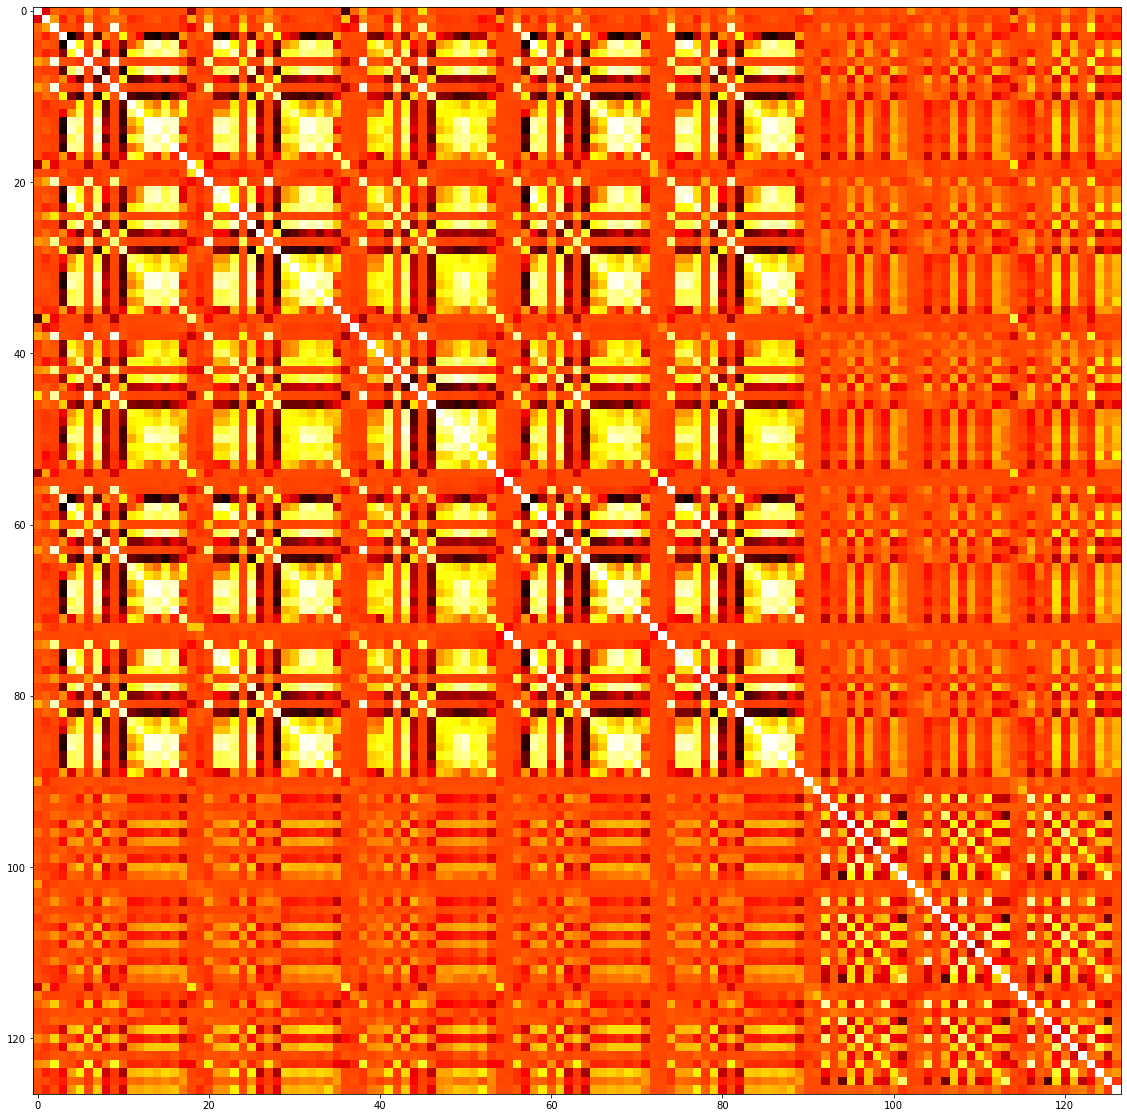

<font size="1">Il s'agit d'une matrice 127x127, puisque nous avons choisi notre modèle avec les 127 features définies précédemment. En effet, nous avons désormais 12 features pour chaque accéléromètre, ainsiq que 18 pour chaque EEG. A cela s'ajoute une dernière feature qui permet de représenter le moment de la nuit auquel ont été enregistrées les données. En effet, il semblerait logique qu'il existe un lien entre celui-ci et les phases de sommeil rencontrées. Nous reconnaissons bien sur la matrice les motifs avec les 5 EEG, puis les 3 accéléromètres.</font>

## Description théorique du modèle utilisé

#### Choix du modèle

<font size="1"> Nous avons ensuite développé et essayé plusieurs algorithmes de machine learning pour voir celui qui avait le meilleur résultat sur les mêmes datasets de training et de test. Ci-dessous nous avons récupéré les résultats obtenus avec les algorithmes essayés avec pour métrique le "f1-score macro" :</font>

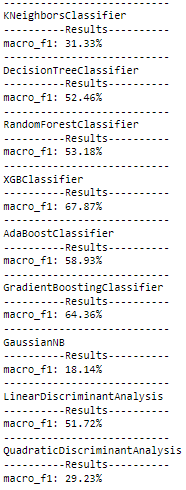

<font size="1">Sur cette première expérience, nous pouvons observer des scores globalement proches de 50% avec comme exceptions les deux algorithmes Gradient Boosting et XGBoost, qui atteignent un F1-score macro de 68 %
Nous avons donc choisi de retenir ce dernier afin de résoudre le problème.

Il ne nous restait plus qu'à utiliser une cross-validation pour optimiser les hyper-paramètres et gagner encore en performance.</font>

#### XGBoost : Approche par Machine Learning 

<font size = "1"> Comme expliqué précédemment, afin de résoudre le problème qui nous est présenté dans ce challenge, nous avons bâti plusieurs algorithmes de machine learning (Random Forest, Logistic Regerssion, ...) avant de nous fixer sur le XGBoost qui renvoyait des résultats satisfaisant dès les premiers essais.  
La méthode XGBoost, contraction de eXtreme Gradient Boosting, est un des algorithmes de machine learning les plus efficaces pour des problèmes de classification. Cet algorithme repose sur l'apprentissage d'ensemble et les arbres de décision, et utilise le Bagging et le Boosting.  
Tout d'abord, dans le bagging (ou Boostrap Aggregating), les données sont divisées aléatoirement en sous-ensemble. Un modèle est ensuite entrainé sur chaque sous-ensemble, et le meilleur résultat est conservé. Les modèles sont entrainés indépendamment et en parallèle, ce qui permet de tester beaucoup de combinaisons.  
Dans le Boosting, à chaque itération, des poids sont donnés aux observations selon leur résultat. Les observations les plus pertinentes auront donc un poids plus important. Un second passage permet ensuite de minimiser les erreurs. Dans le cas de XGBoost, les erreurs sont minimisées par l'algorithme de descente du gradient.
</font>

### Méthode de cross-validation

<font size="1">
Notre modèle XGBoost choisi, il nous restait encore les paramètres du modèle à optimiser : les hyper-paramètres. Ceux qui nous ont paru les plus pertinents étaient, par order de pertinence :  
</font>

1.   <font size="1">n_estimators : le nombre d'étapes de boosting à réaliser</font>
2.   <font size="1">max_depth : la profondeur maximale des arbres d'apprentissage individuel</font>
3.   <font size="1">learning_rate : pas pour appretissage</font>
4.   <font size="1">subsample : la fraction de l'ensemble à utiliser pour les apprentissages</font>
5.   <font size="1">colsample_bytree : ratio du nombre de colonnes pour la construction de chaque arbre</font>
6.   <font size="1">colsample_bylevel : ratio du nombre de colonnes pour chaque niveau
</font>

<font size="1">
Le nombre d'hyper-paramètres étant conséquent, nous avons commencé par estimer les paramètres les moins pertinents en utilisant un RandomGridSearch, qui permet de ne pas tester toutes les combinaisons, mais seulement un nombre défini tiré au hasard. Nous avons alors obtenu les valeurs suivantes : learning_rate = 0.2, subsample=0.6, colsample_bytree=0.8, colsample_bylevel=0.7. Enfin, pour n_estimators et max_depth, qui sont les paramètres les plus pertinents, nous avons utilisé GridSearch, qui teste toutes les possibilités et utilise une validation croisée pour retourner les meilleurs paramètres. Nous avons alors obtenu : n_estimators = 200, max_depth = 2.  
Grâce à cette étape de validation croisée, nous avons pu améliorer nos performances, passant de 69% à 71% de "f1-macro".
</font>

#### Aperçu de la méthode alternative via CNN :

<font size="1">
Nous avons également décidé de tester un modèle de type réseau de neurone convolutif (CNN) afin de comparer ses performances avec le modèle précédent et voir si il permettrait d'obtenir de meilleurs performances en terme de prédiction des phases de sommeil d'un patient. 
Contrairement à la version XG Boost, le modèle effectue ici un pré-traîtement des données d'entrée. En effet, suivant ce qui apparait dans la littérature, nous commençons par appliquer un filtre de type réponse impulsionnelle infinie (IIR). Comme le conseillait l'article fourni en annexe du challenge [2], nous l'avons paramétré pour une fréquence de coupure équivalente à -3 dB. Ce filtre est appliqué sur chacun des eeg afin d'en supprimer certains bruits et résidus qui pourraient fausser l'apprentissage du modèle par la suite. 
Enfin, chacune des features présentées précédemment est transformée en spectrogramme, réputé comme plus précis dans le cas d'un réseau de neurones.
En particulier, la configuration retenue pour la soumission finale proposée est :  </font>

*   <font size="1">Un enchaînement de 6 couches de Convolution et de 6 Couches de correction de type ReLU paramétrées par appliquation d'un processus de cross-validation.</font>
*   <font size="1">Une dernière couche de Transformation Linéaire afin de se ramener aux 5 phases de sommeil.</font>

<font size = "1">
Cependant, malgré la validation croisée qui nous a permis d'atteindre une global accuracy d'environ 80% sur le dataset d'entraînement, les capacités de prédiction de ce modèle se sont révélées assez décevantes, avec une accuracy maximale atteinte de 65 % sur le dataset de test. Ainsi, malgré les débuts prometteurs du modèle et ses résultats relativement intéressants par rapport à certains algorithmes de Machine Learning, nous avons décidé de nous consacrer principalement sur le modèle de XG Boost qui apportait, même sans fine tuning des paramètres, des résultats encore meilleurs.
</font>

### Résultats


<font size="1">Voilà finalement les résultats que nous avons obtenus. Nous avons mis en bleu les modèles sans cross validation pour améliorer les choix des hyper-paramètres, en orange le meilleur modèle avec cross-validation, et en vert les résultats de Deep-Learning.
</font>

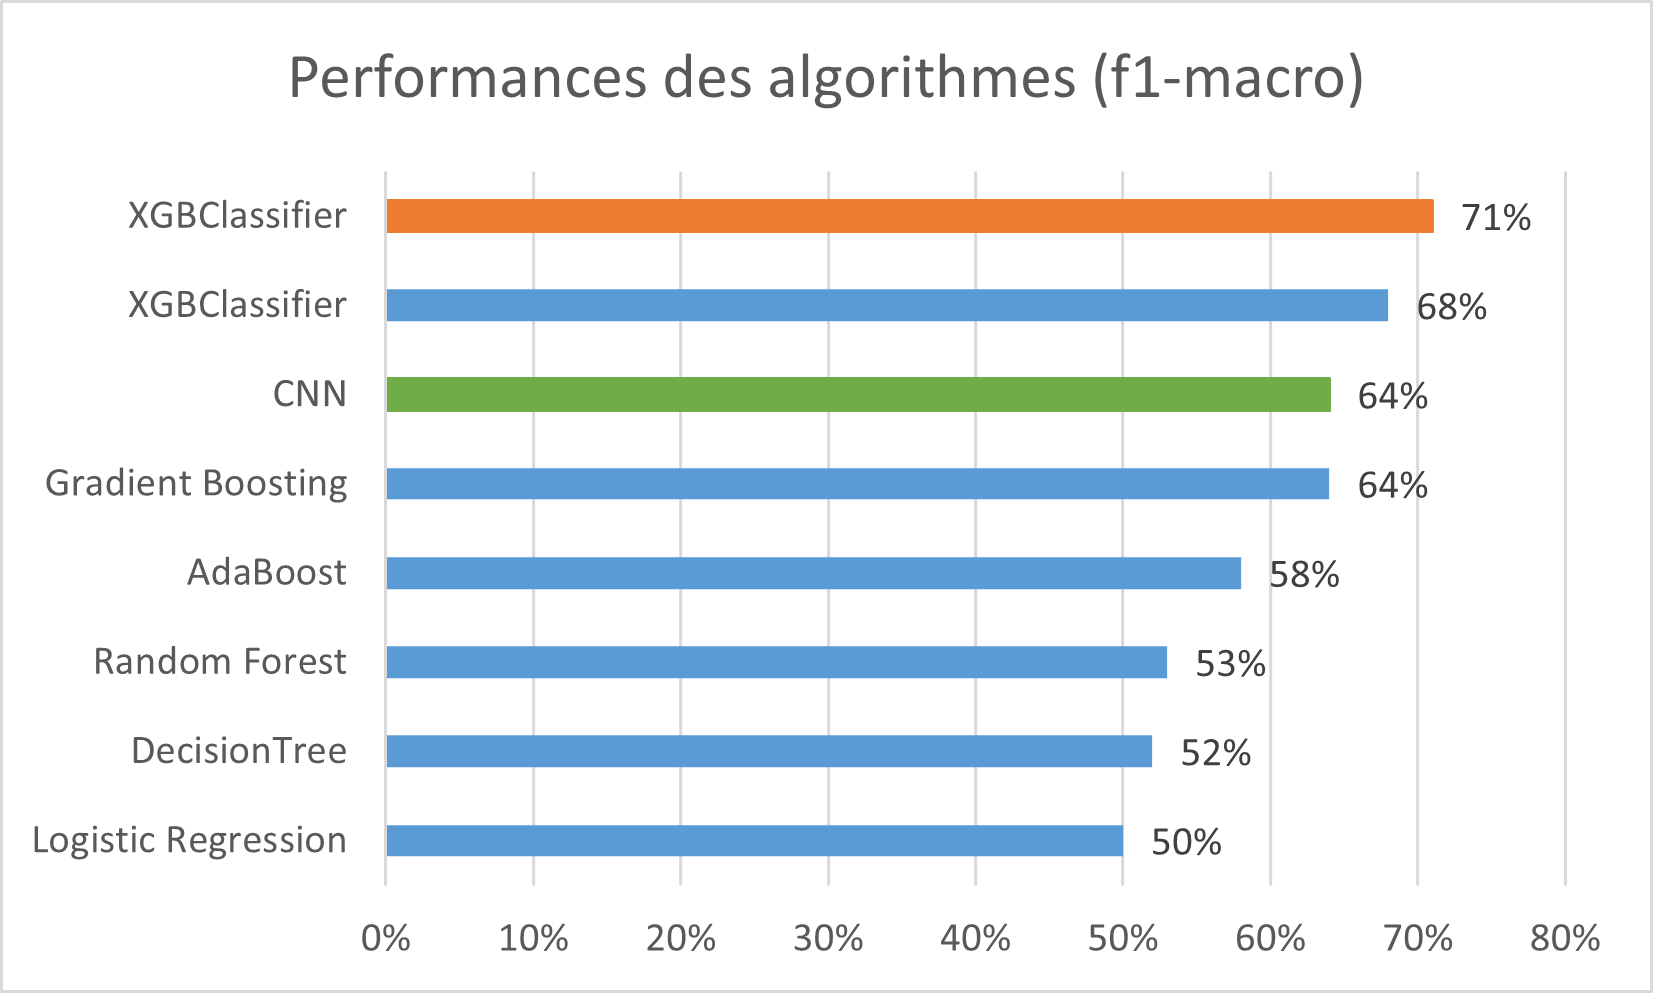

<font size="1">La méthode XGBoost a donc été de loin la plus performante vis-à-vis des autres, ce qui a d'autant été renforcé par la cross-validation qui a permis d'affiner les hyper-paramètres de ce problème.</font>

### Conclusion

<font size = "1"> 
Pour conclure, nous avons pu au cours de ce challenge explorer de nombreux algorithmes de Machine Learning (et aussi de Deep Learning) dans l'objectif de résoudre le problème et donc de classifier les phases de sommeil en fonction des données des accéléromètres et des électro-encéphalogrammes récupérés à l'aide du Dreem Headband.  
Parmi ces algortithmes, deux sont ressortis et ont livré des résultats positifs dès les premiers essais, même sans validation croisée. Il s'agit du Classifier XGBoost ainsi que du réseau de neurones convolutif.  
Si sur le premier des deux, aucun pré-traîtement n'a permis d'améliorer les résultats, le passage des données au spectrogramme et la mise en place de filtres séquentiels de type IIR ont permis d'améliorer la performance du second d'environ 5 points.  
Cependant, après utilisation de la validation croisée dans l'objectif d'adapter les hyperparamètres des deux modèles, l'algorithme XGBoost s'est particulièrement illustré en nous permettant d'atteindre des résultats de prédiction d'environ 71%, ce qui n'a jamais été atteint par un autre algorithme lors de nos tests. C'est donc ce modèle que nous avons décidé de conserver comme résultat final de ce challenge.
</font>

### Références

<font size = "1">  
[1] Aboalayon, Khald & Faezipour, Miad & Almuhammadi, Wafaa & Moslehpour, Saeid. (2016). Sleep Stage Classification Using EEG Signal Analysis: A Comprehensive Survey and New Investigation. Entropy. 18. 10.3390/e18090272.  
[2] Lijuan Duan, Mengying Li, Changming Wang, Yuanhua Qiao, Zeyu Wang, Sha Sha, Mingai Li. (2021). A Novel Sleep Staging Network Based on Data Adaptation and Multimodal Fusion.  
[3] Motoki Yoshihi,*Shima Okada,Tianyi Wang,Toshihiro Kitajima, Masaaki Makikawa. (2020). Estimating Sleep Stages Using a Head Acceleration Sensor.  
[4] Igor Stancin, Mario Cifrek, Alan Jovic. (2021). A Review of EEG Signal Features and Their Application in Driver Drowsiness Detection Systems.
</font>